In [6]:
import mysql.connector as db

In [7]:
mydb = db.connect(host='localhost', user='root', passwd='mysql123', use_pure=True, autocommit=True)
cursor = mydb.cursor()

In [9]:
cursor.execute('create database FSDS')

In [9]:
cursor.execute('use FSDS')

#### 1. Create a table for attribute dataset and dress dataset

In [17]:
## query to create attribute table for inserting AttributeDataSet.csv data
q1 = "create table attribute(Dress_ID int, Style varchar(30), Price varchar(30), Rating float, Size varchar(30), Season varchar(30), NeckLine varchar(30), SleeveLength varchar(30), waiseline varchar(30), Material varchar(30), FabricType varchar(30), Decoration varchar(30), PatternType varchar(30), Recommendation int)"
cursor.execute(q1)

In [18]:
## query to create Dress_Sales table for inserting Dress Sales.csv data
q2 = "create table Dress_sales(Dress_ID varchar(20), `29/8/2013` varchar(20), `31/8/2013` varchar(20), `2/9/2013` varchar(20), `4/9/2013` varchar(20), `6/9/2013` varchar(20), `8/9/2013` varchar(20), `10/9/2013` varchar(20), `12/9/2013` varchar(20), `14/9/2013` varchar(20), `16/9/2013` varchar(20), `18/9/2013` varchar(20), `20/9/2013` varchar(20), `22/9/2013` varchar(20), `24/9/2013` varchar(20), `26/9/2013` varchar(20), `28/9/2013` varchar(20), `30/9/2013` varchar(20), `2/10/2013` varchar(20), `4/10/2013` varchar(20), `6/10/2013` varchar(20), `8/10/2010` varchar(20), `10/10/2013` varchar(20), `12/10/2013` varchar(20))"
cursor.execute(q2)

#### 2. Do a bulk load for these two tables for respective dataset

In [19]:
import csv

## query to insert AttributeDataSet.csv data
q3 = 'INSERT INTO attribute(Dress_ID, Style, Price, Rating, Size, Season, NeckLine, SleeveLength, waiseline, Material, FabricType, Decoration, PatternType, Recommendation) VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'                                                         

## query to insert Dress Sales.csv data
q4 = 'INSERT INTO Dress_Sales(Dress_ID, `29/8/2013`, `31/8/2013`, `2/9/2013`, `4/9/2013`, `6/9/2013`, `8/9/2013`, `10/9/2013`, `12/9/2013`, `14/9/2013`, `16/9/2013`, `18/9/2013`, `20/9/2013`, `22/9/2013`, `24/9/2013`, `26/9/2013`, `28/9/2013`, `30/9/2013`, `2/10/2013`, `4/10/2013`, `6/10/2013`, `8/10/2010`, `10/10/2013`, `12/10/2013`) VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)'

## open CSV files
file1 = open('Attribute Data Set.csv')
file2 = open('Dress Sales1.csv')

## reading CSV files
file1_csv_data = csv.reader(file1)
file2_csv_data = csv.reader(file2)

## list to append CSV data
file1_data = []
file2_data = []

## appending single row as a tuple in above lists
for i in file1_csv_data:
     file1_data.append(tuple(i))
        
for j in file2_csv_data:
    ## as tuples are immutable, insert whole row as list to further modify it
    file2_data.append(j)
    
for lst in file2_data: 
    for null_value_idx in range(len(lst)):
        
        ## 'Dress Sales.csv' is having some unnecessary blank colums, below code is to remove it 
        if null_value_idx >= 24:
            pop_indx = 24
            lst.pop(pop_indx)
        
        ## total valid colums are 24 if within this range if it finds any '' value, it'll assign 'NULL' to it    
        elif lst[null_value_idx] == '':
            lst[null_value_idx] = 'NULL'
            
## removing first row from the CSV file, as it contains column name
file1_data.pop(0)
file2_data.pop(0)

## inserting data
cursor.executemany(q3, file1_data)
cursor.executemany(q4, tuple(file2_data))
print("Data inserted!")

Data inserted!


In [137]:
## to get idea about how to remove extra blank columns and setting '' values as 'NULL' i have implemented below method

lst = [[123, 34, 234, '', 324, '', 234, 342, '', 3534, '', ''],
 [123, 34, 67, 76, 324, '', 234, 342, '', '', '', ''],
 [123, 34, '', '', 324, '', 234, 342, 876, 3534, '', '']]

In [138]:
print(len(lst))

for i in lst:
    for j in range(len(i)):   ## range(0,12)
        if j >= 10:                 ## to ignore further ''
            pop_indx = 10         ## to pop a
            i.pop(pop_indx)

        elif i[j] == '':
            i[j] = 'NULL'
        
lst

3


[[123, 34, 234, 'NULL', 324, 'NULL', 234, 342, 'NULL', 3534],
 [123, 34, 67, 76, 324, 'NULL', 234, 342, 'NULL', 'NULL'],
 [123, 34, 'NULL', 'NULL', 324, 'NULL', 234, 342, 876, 3534]]

#### 3. Read these dataset in pandas as a dataframe

In [2]:
import pandas as pd

In [3]:
df1 = pd.read_csv('Attribute Data Set.csv')
df2 = pd.read_csv('Dress Sales1.csv')

In [18]:
df1

dress_id    style    price  rating  size  season   neckline  \
0    1006032852     Sexy      Low     4.6     M  Summer     o-neck   
1    1212192089   Casual      Low     0.0     L  Summer     o-neck   
2    1190380701  vintage     High     0.0     L  Automn     o-neck   
3     966005983    Brief  Average     4.6     L  Spring     o-neck   
4     876339541     cute      Low     4.5     M  Summer     o-neck   
..          ...      ...      ...     ...   ...     ...        ...   
495   713391965   Casual      Low     4.7     M  Spring     o-neck   
496   722565148     Sexy      Low     4.3  free  Summer     o-neck   
497   532874347   Casual  Average     4.7     M  Summer     v-neck   
498   655464934   Casual  Average     4.6     L  winter  boat-neck   
499   919930954   Casual      Low     4.4  free  Summer     v-neck   

    sleevelength waiseline       material  fabrictype  decoration patterntype  \
0      sleevless    empire            NaN     chiffon     ruffles      animal   
1          Petal   natural     microfiber         NaN     ruffles      animal   
2           full   natural       polyster         NaN         NaN       print   
3           full   natural           silk     chiffon  embroidary       print   
4      butterfly   natural  chiffonfabric     chiffon         bow         dot   
..           ...       ...            ...         ...         ...         ...   
495         full   natural       polyster         NaN         NaN       solid   
496         full    empire         cotton         NaN         NaN         NaN   
497         full    empire         cotton         NaN        lace       solid   
498    sleevless    empire           silk  broadcloth    applique       print   
499        short    empire         cotton    Corduroy        lace       solid   

     recommendation  
0                 1  
1                 0  
2                 0  
3                 1  
4                 0  
..              ...  
495               1  
496               0  
497               1  
498               1  
499               0  

[500 rows x 14 columns]

In [19]:
df2

Dress_ID  29/8/2013  31/8/2013  2/9/2013  4/9/2013  6/9/2013  8/9/2013  \
0    1006032852       2114       2274      2491      2660      2727      2887   
1    1212192089        151        275       570       750       813      1066   
2    1190380701          6          7         7         7         8         8   
3     966005983       1005       1128      1326      1455      1507      1621   
4     876339541        996       1175      1304      1396      1432      1559   
..          ...        ...        ...       ...       ...       ...       ...   
495   713391965          0          0         0       560       554       544   
496   722565148          0          0         0       875       866       861   
497   532874347          0          0         0       734       728       726   
498   655464934          0          0         0       254       259       261   
499   919930954          0          0         0       538       545       558   

     10/9/2013 12/9/2013 14/9/2013  ... Unnamed: 26 Unnamed: 27 Unnamed: 28  \
0         2930      3119      3204  ...         NaN         NaN         NaN   
1         1164      1558      1756  ...         NaN         NaN         NaN   
2            9        10        10  ...         NaN         NaN         NaN   
3         1637      1723      1746  ...         NaN         NaN         NaN   
4         1570      1638      1655  ...         NaN         NaN         NaN   
..         ...       ...       ...  ...         ...         ...         ...   
495        537       525       519  ...         NaN         NaN         NaN   
496        854       850       844  ...         NaN         NaN         NaN   
497        715       694       690  ...         NaN         NaN         NaN   
498        263       268       270  ...         NaN         NaN         NaN   
499        563       578       585  ...         NaN         NaN         NaN   

    Unnamed: 29  Unnamed: 30  Unnamed: 31  Unnamed: 32  Unnamed: 33  \
0           NaN          NaN          NaN          NaN          NaN   
1           NaN          NaN          NaN          NaN          NaN   
2           NaN          NaN          NaN          NaN          NaN   
3           NaN          NaN          NaN          NaN          NaN   
4           NaN          NaN          NaN          NaN          NaN   
..          ...          ...          ...          ...          ...   
495         NaN          NaN          NaN          NaN          NaN   
496         NaN          NaN          NaN          NaN          NaN   
497         NaN          NaN          NaN          NaN          NaN   
498         NaN          NaN          NaN          NaN          NaN   
499         NaN          NaN          NaN          NaN          NaN   

     Unnamed: 34  Unnamed: 35  
0            NaN          NaN  
1            NaN          NaN  
2            NaN          NaN  
3            NaN          NaN  
4            NaN          NaN  
..           ...          ...  
495          NaN          NaN  
496          NaN          NaN  
497          NaN          NaN  
498          NaN          NaN  
499          NaN          NaN  

[500 rows x 36 columns]

#### 4. Convert attribute dataset in json format

In [20]:
js = df1.to_json()

In [21]:
js

'{"dress_id":{"0":1006032852,"1":1212192089,"2":1190380701,"3":966005983,"4":876339541,"5":1068332458,"6":1220707172,"7":1219677488,"8":1113094204,"9":985292672,"10":1117293701,"11":898481530,"12":957723897,"13":749031896,"14":1055411544,"15":1162628131,"16":624314841,"17":830467746,"18":840857118,"19":1113221101,"20":861754372,"21":856178100,"22":1122989777,"23":840516484,"24":768517084,"25":1139843344,"26":1004212992,"27":1235426503,"28":942808364,"29":629131530,"30":851945460,"31":1150275464,"32":1026634314,"33":978773911,"34":827791337,"35":640823350,"36":801861988,"37":1060207186,"38":1054679816,"39":941190190,"40":943844640,"41":661795386,"42":875312593,"43":971387676,"44":1021185637,"45":1163826114,"46":735635595,"47":1175184188,"48":679415939,"49":884147971,"50":841203385,"51":1117997056,"52":1160536550,"53":828623528,"54":763708514,"55":1153442065,"56":743729613,"57":1000493051,"58":911085061,"59":1174854264,"60":1053296757,"61":1033843327,"62":1083779666,"63":746255172,"64":1

#### 5. Store this dataset into mongodb

In [3]:
import pymongo
import json
import pandas as pd

In [17]:
client = pymongo.MongoClient("mongodb://localhost:27017/")

df3 = pd.read_csv('Attribute Data Set.csv')

data = df.to_dict(orient='records')

db = client['attribute_data']

db.Attribute.insert_many(data)

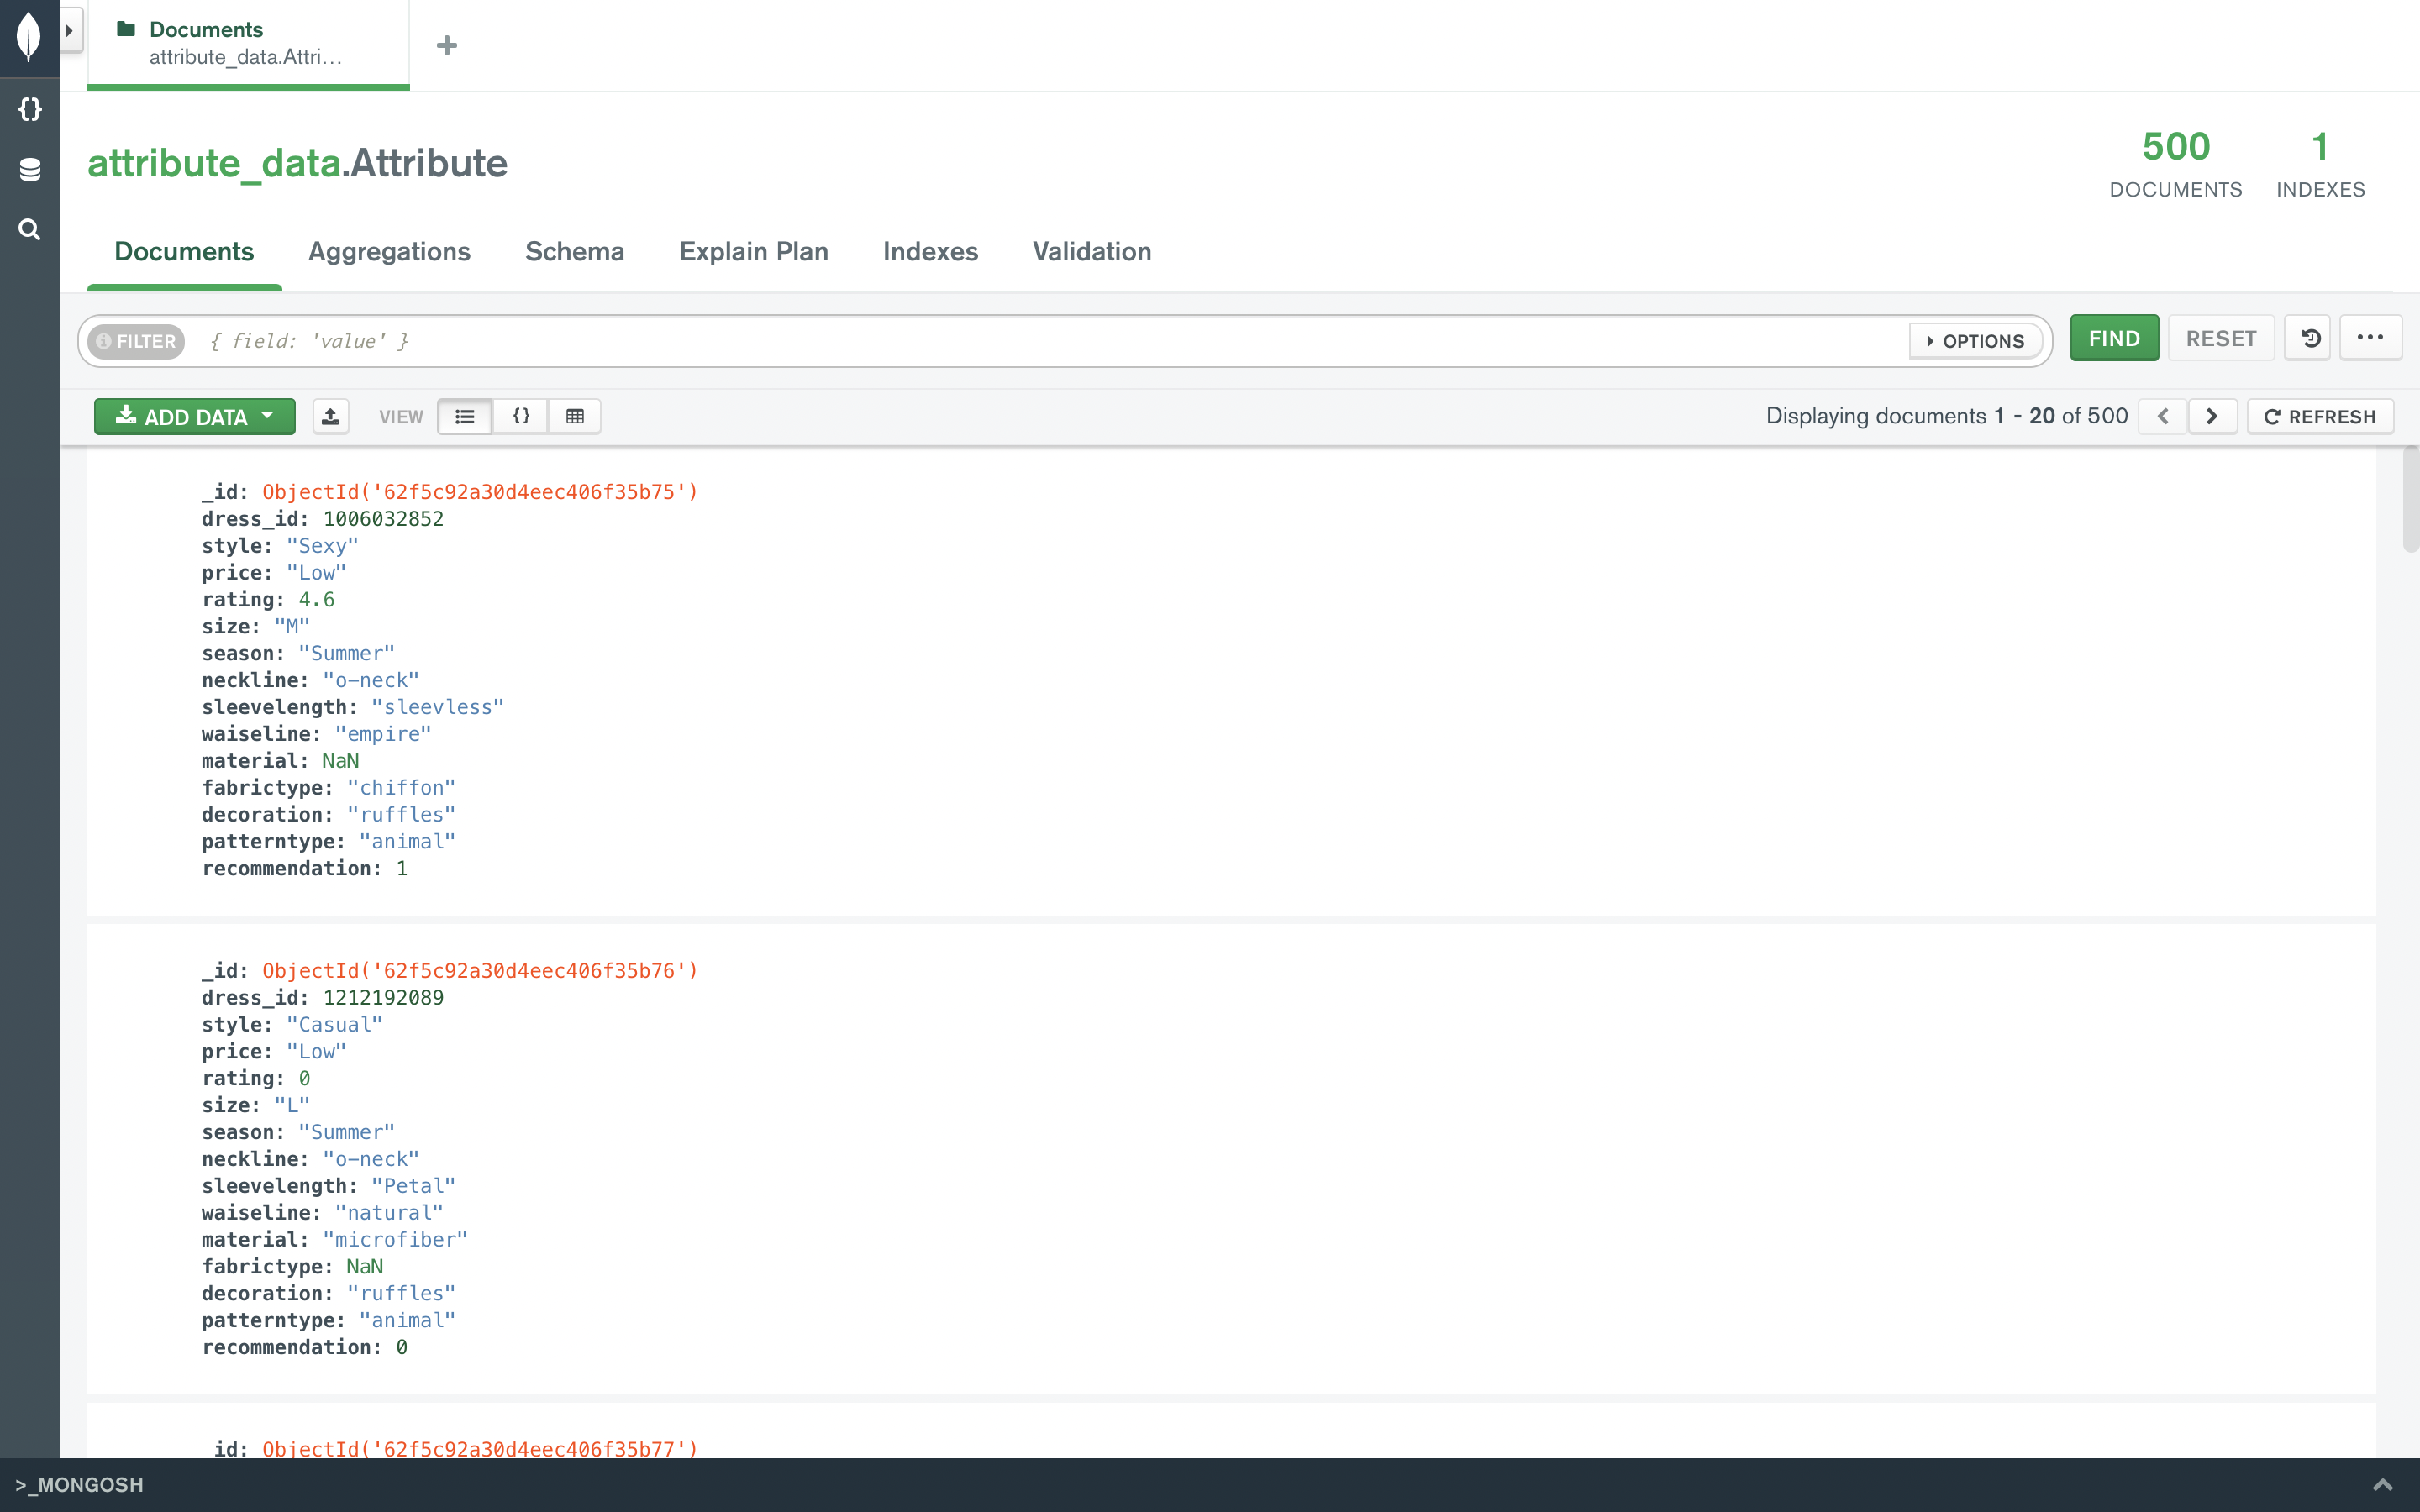

In [18]:
df3 = pd.read_csv('Dress Sales1.csv')

data = df.to_dict(orient='records')

db = client['dress_sales_data']

db.Dress_sales.insert_many(data)

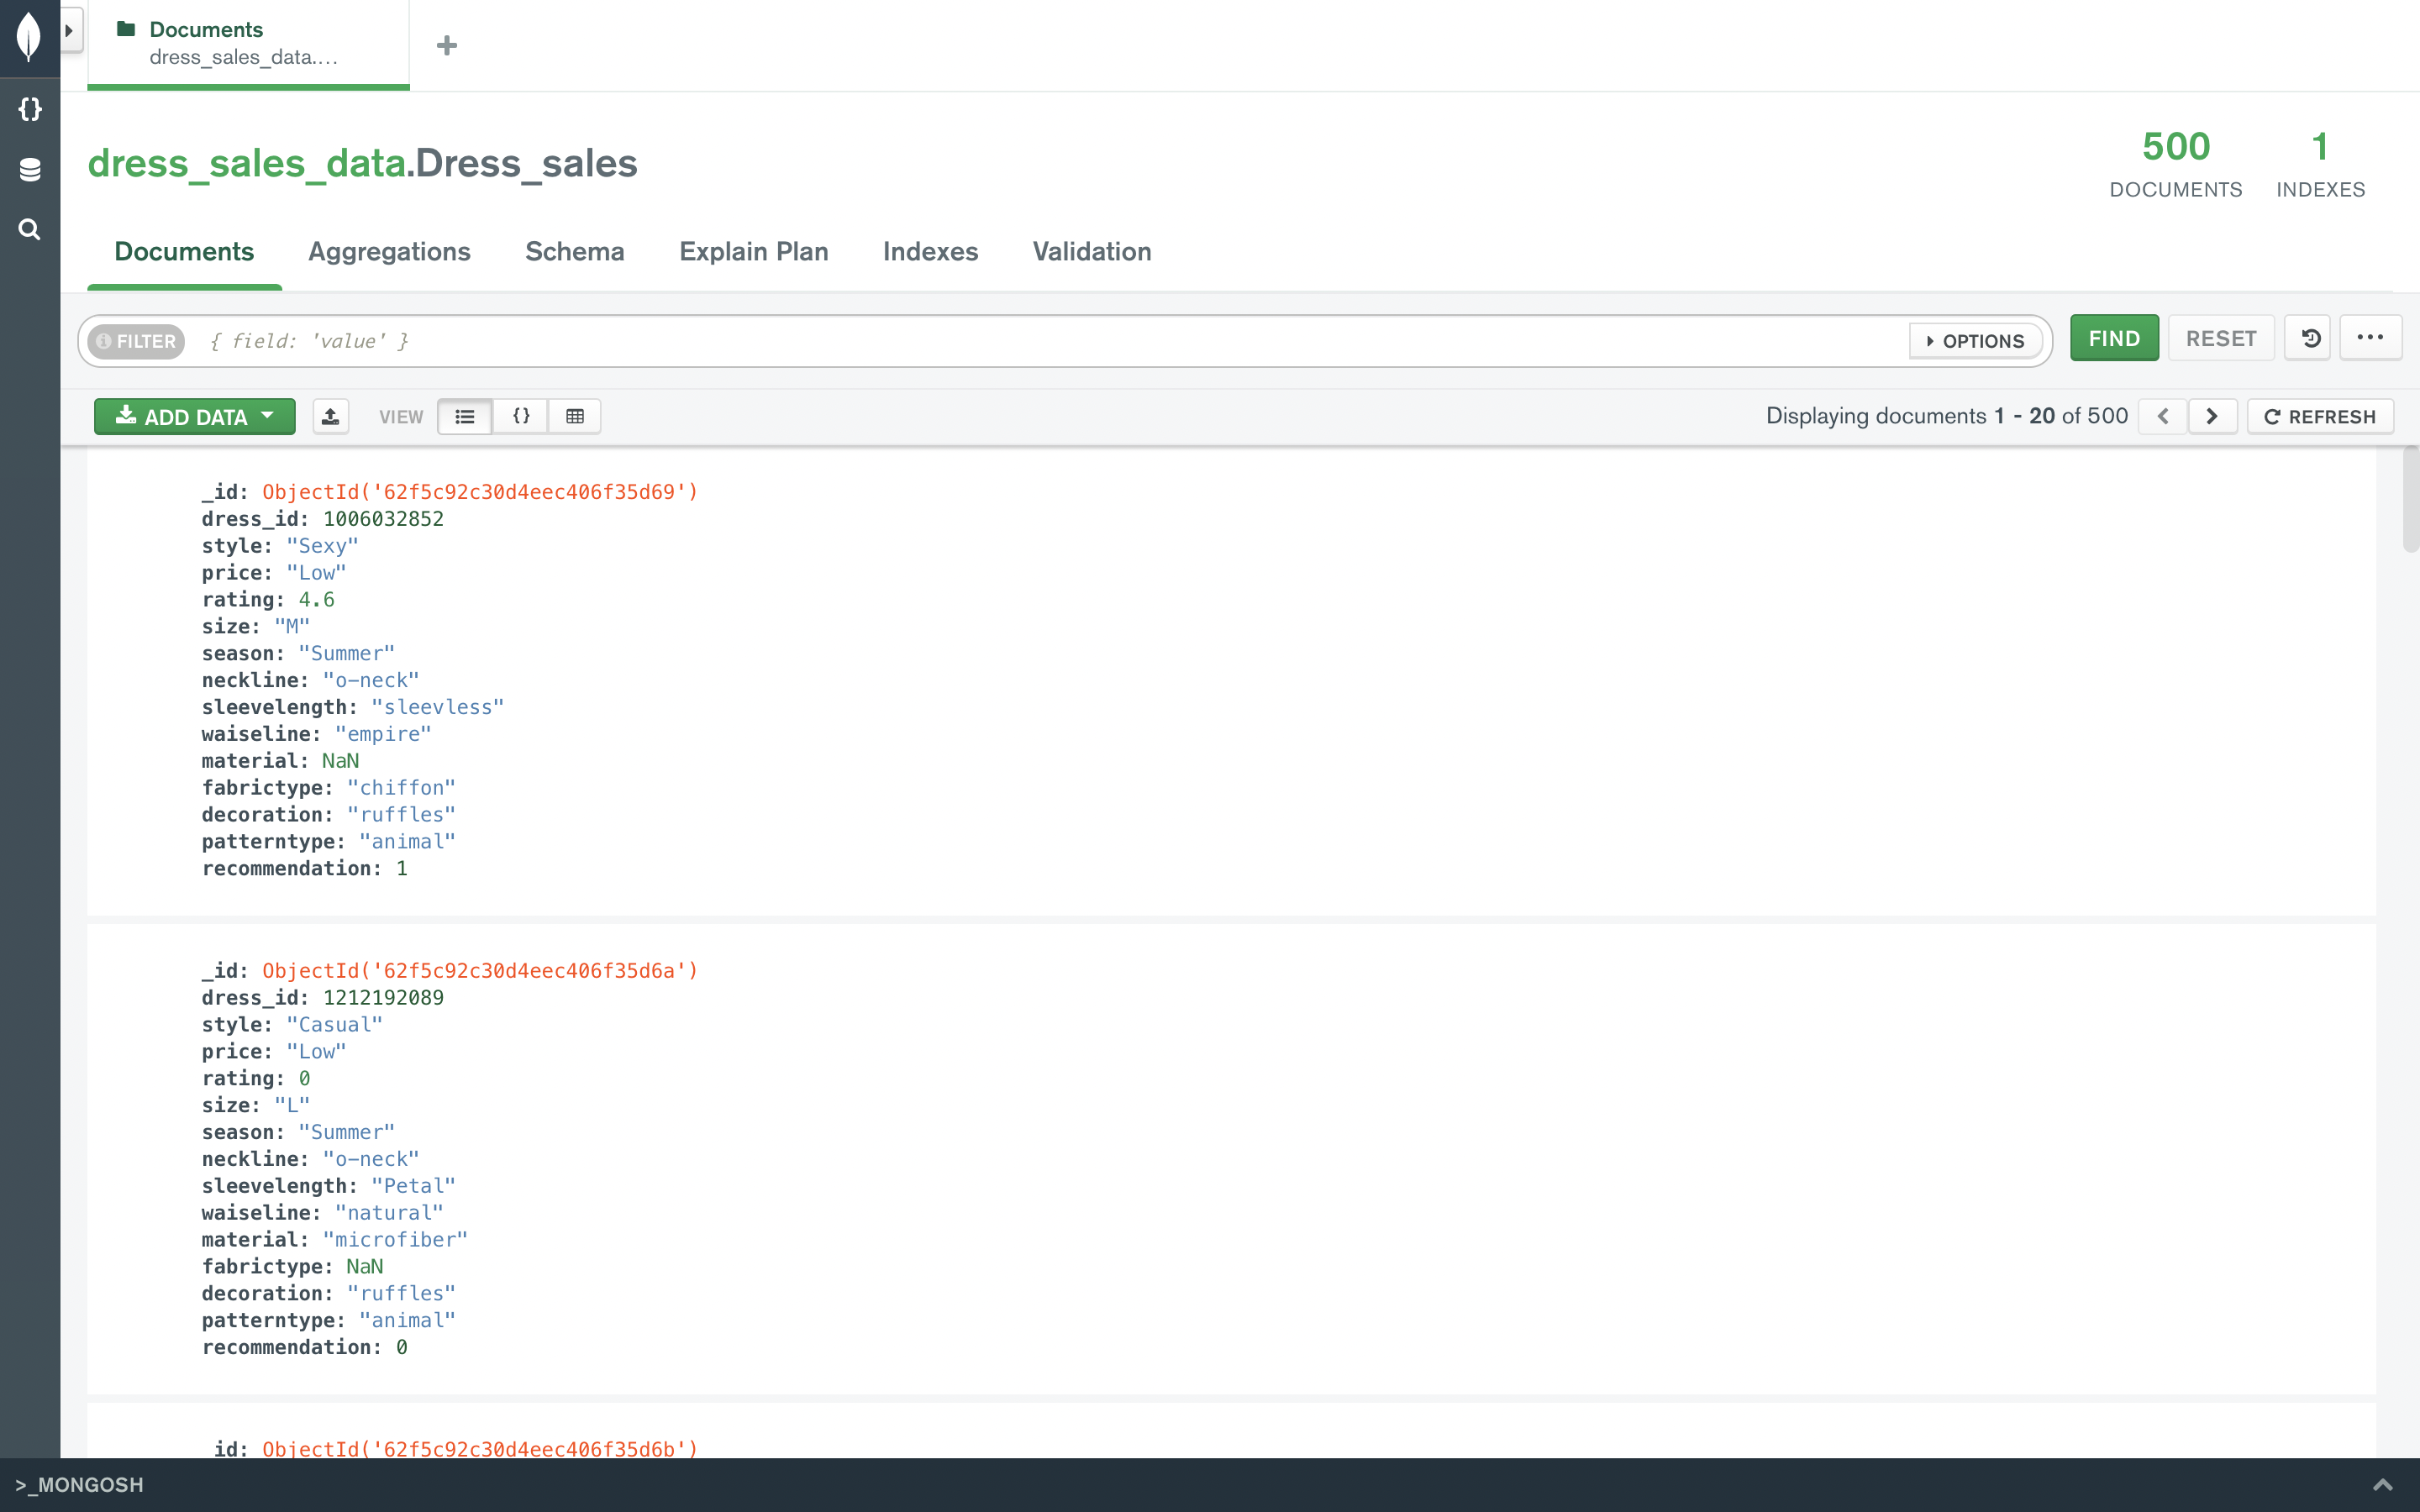

#### 6. In sql task try to perform left join operation with attribute dataset and dress dataset on column Dress_ID

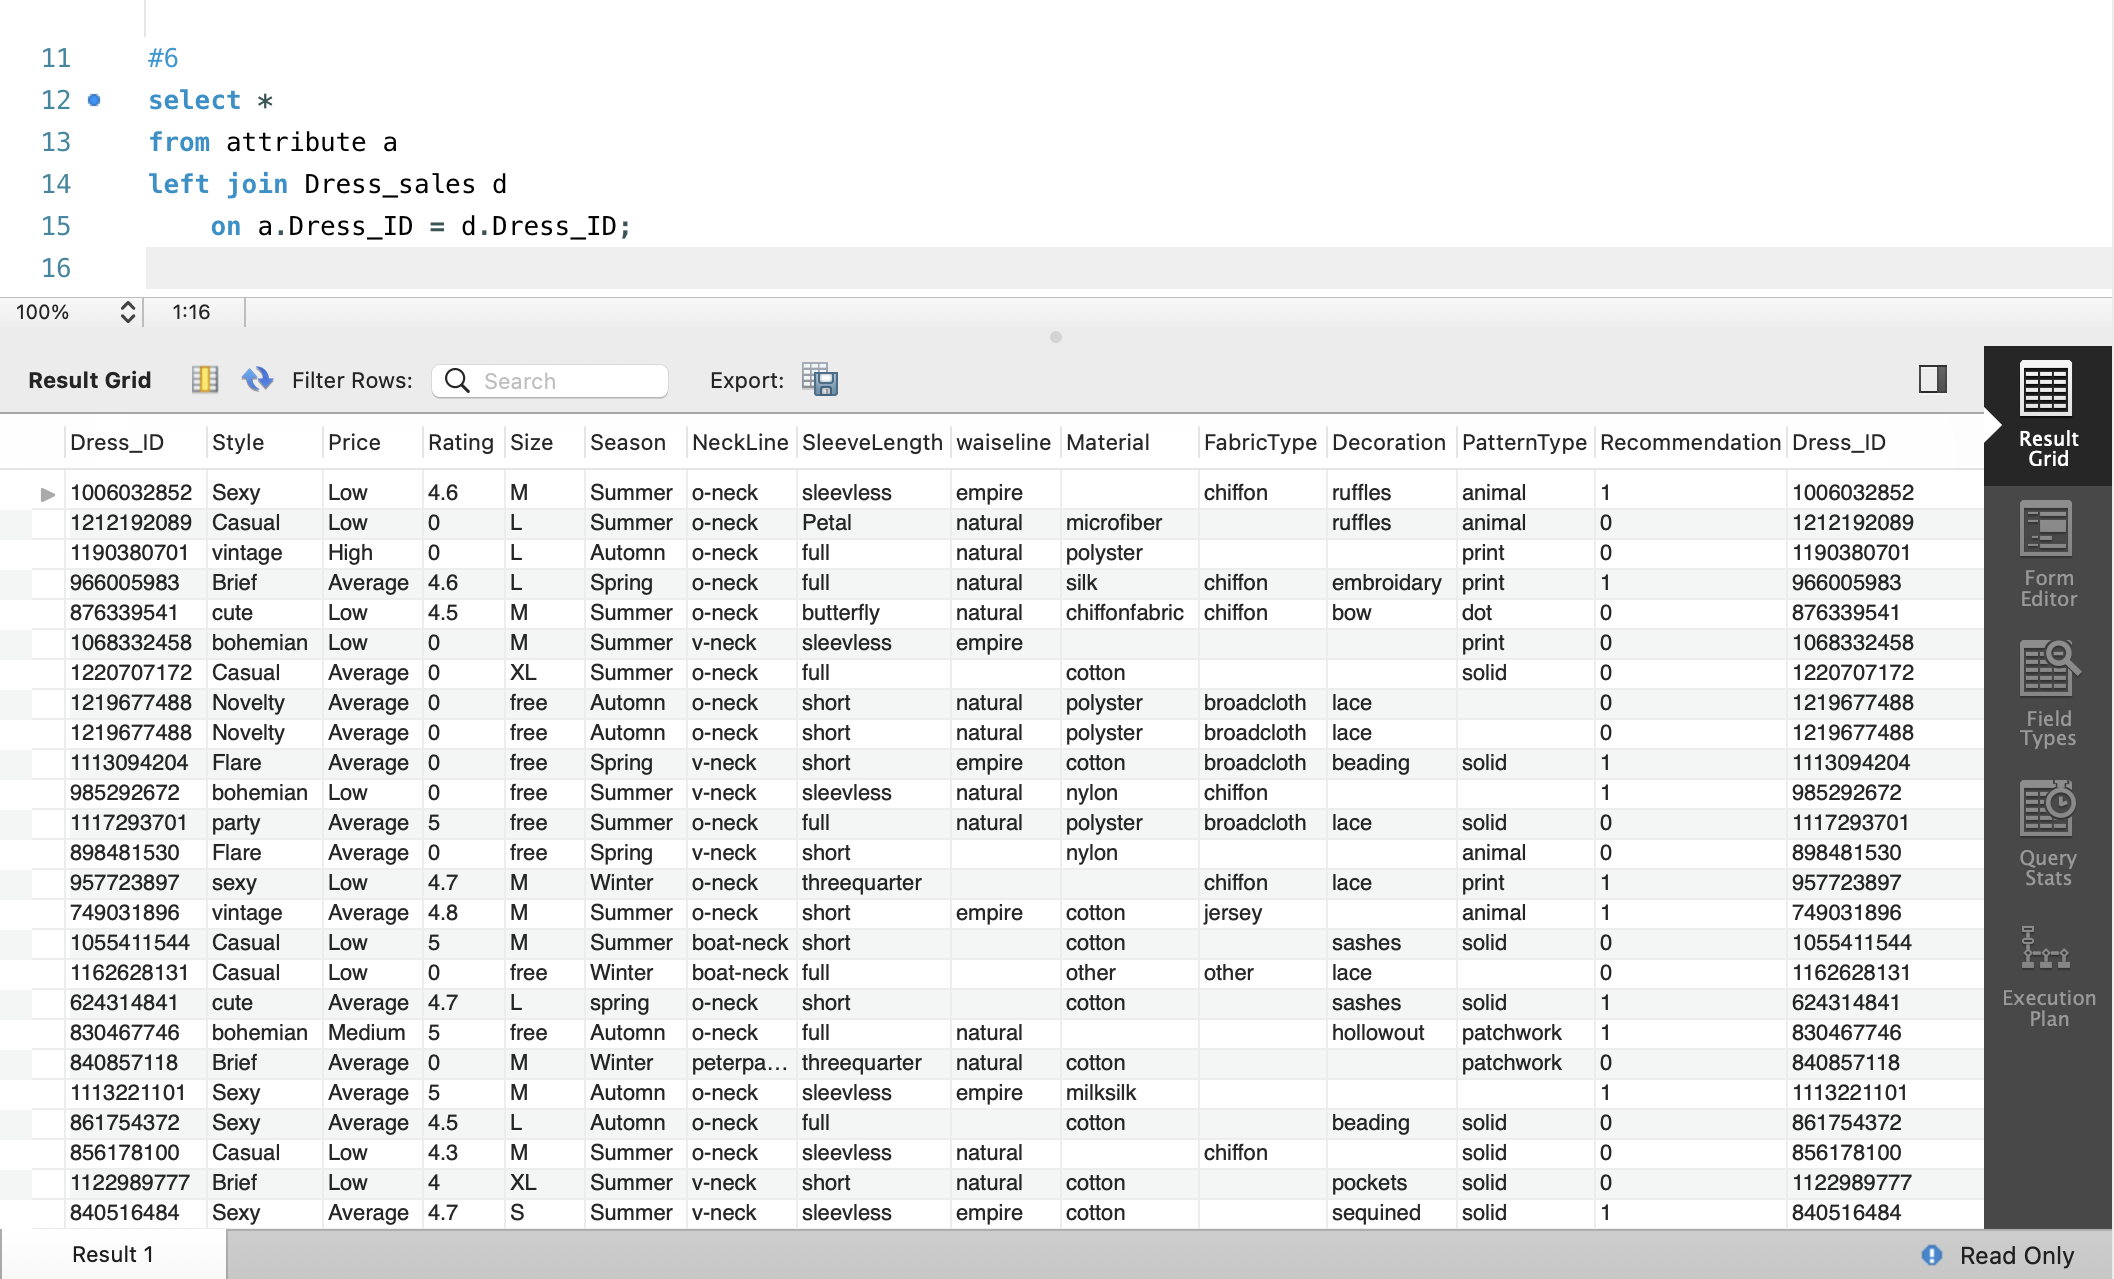

#### 7. Write a sql query to find out how many unique dress that we have based on dress id

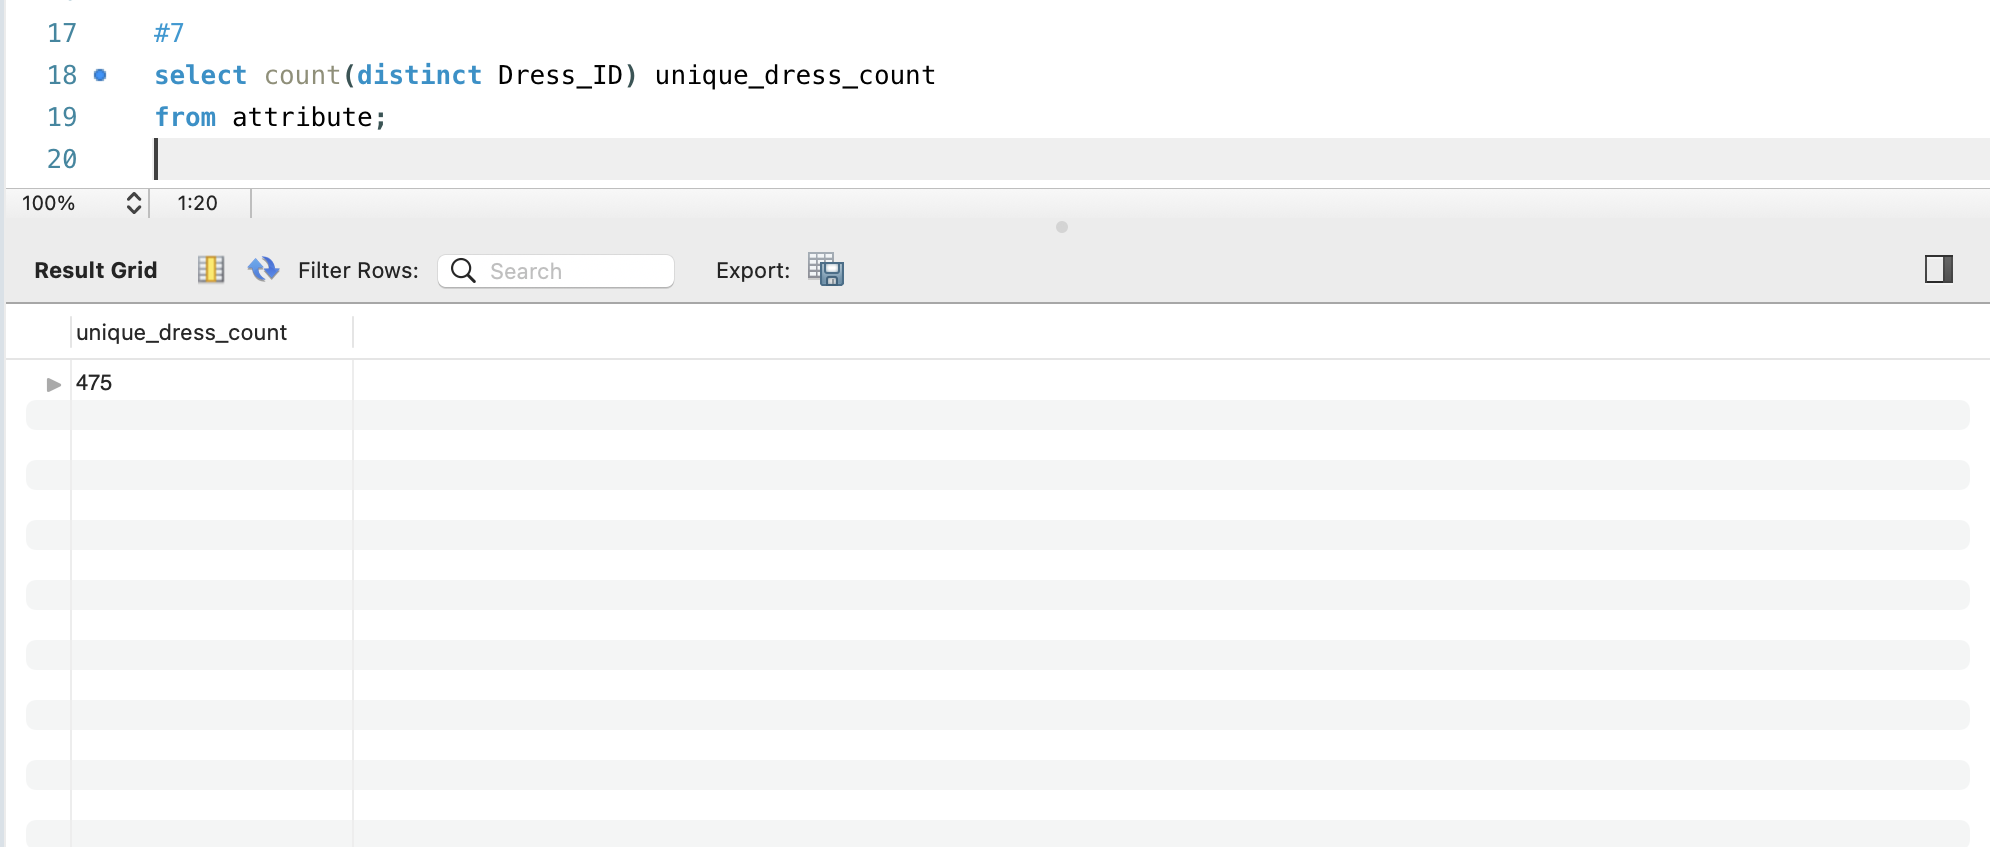

#### 8. Try to find out how many dresses are having recommendation 0

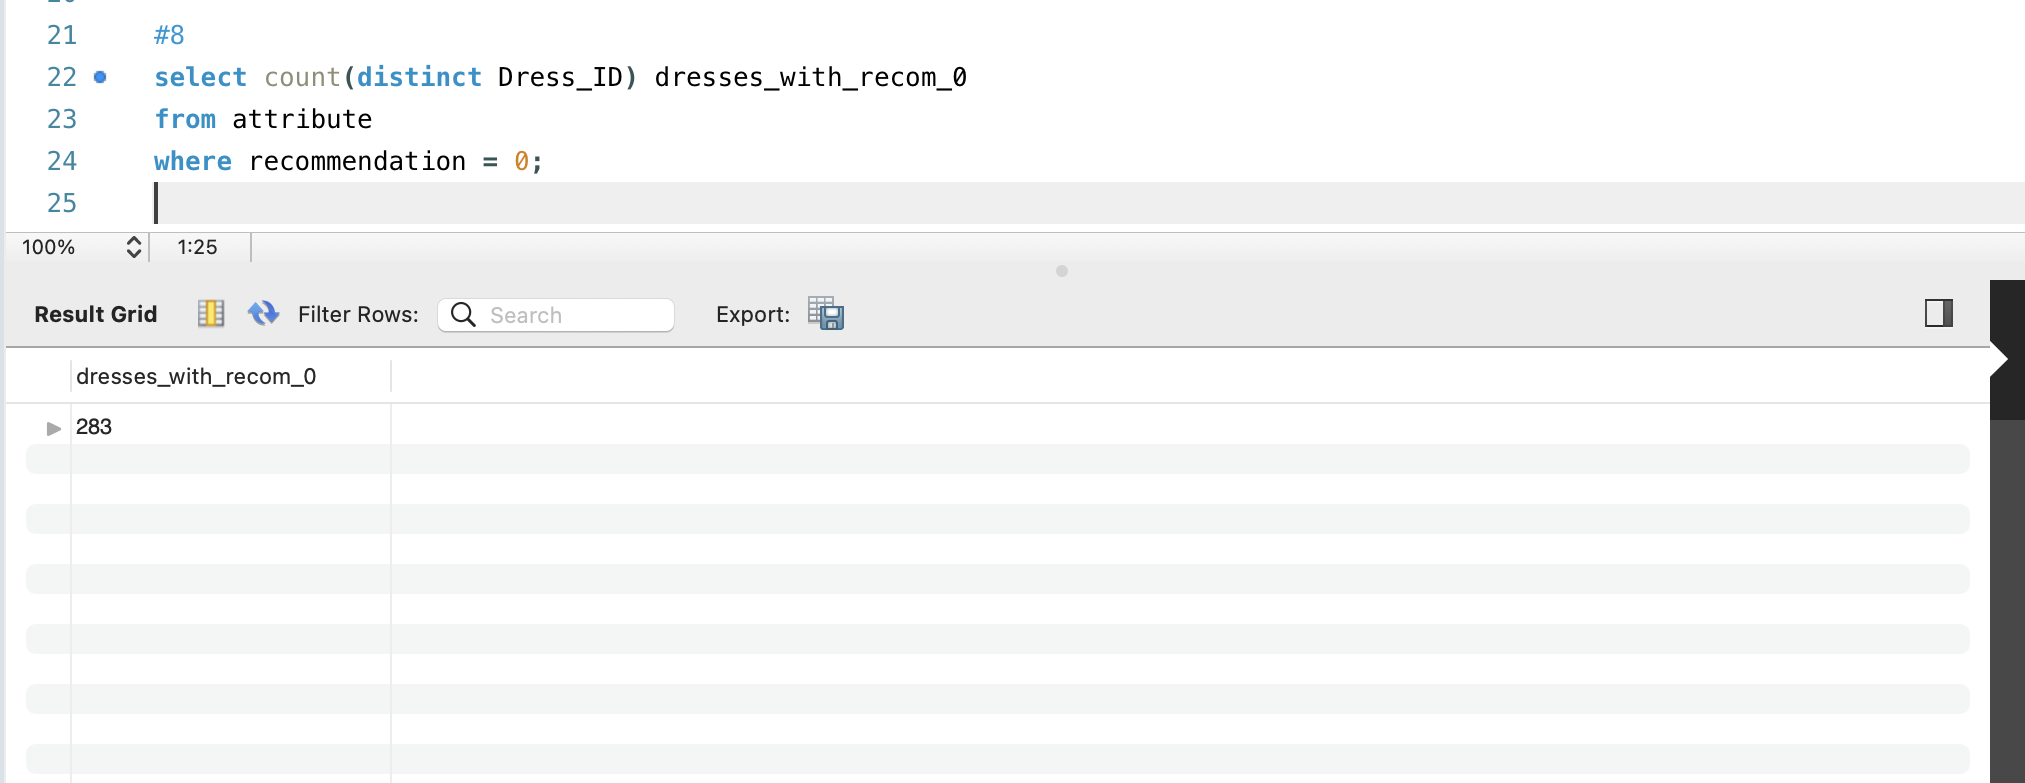

#### 9. Try to find out total dress sale for individual dress id

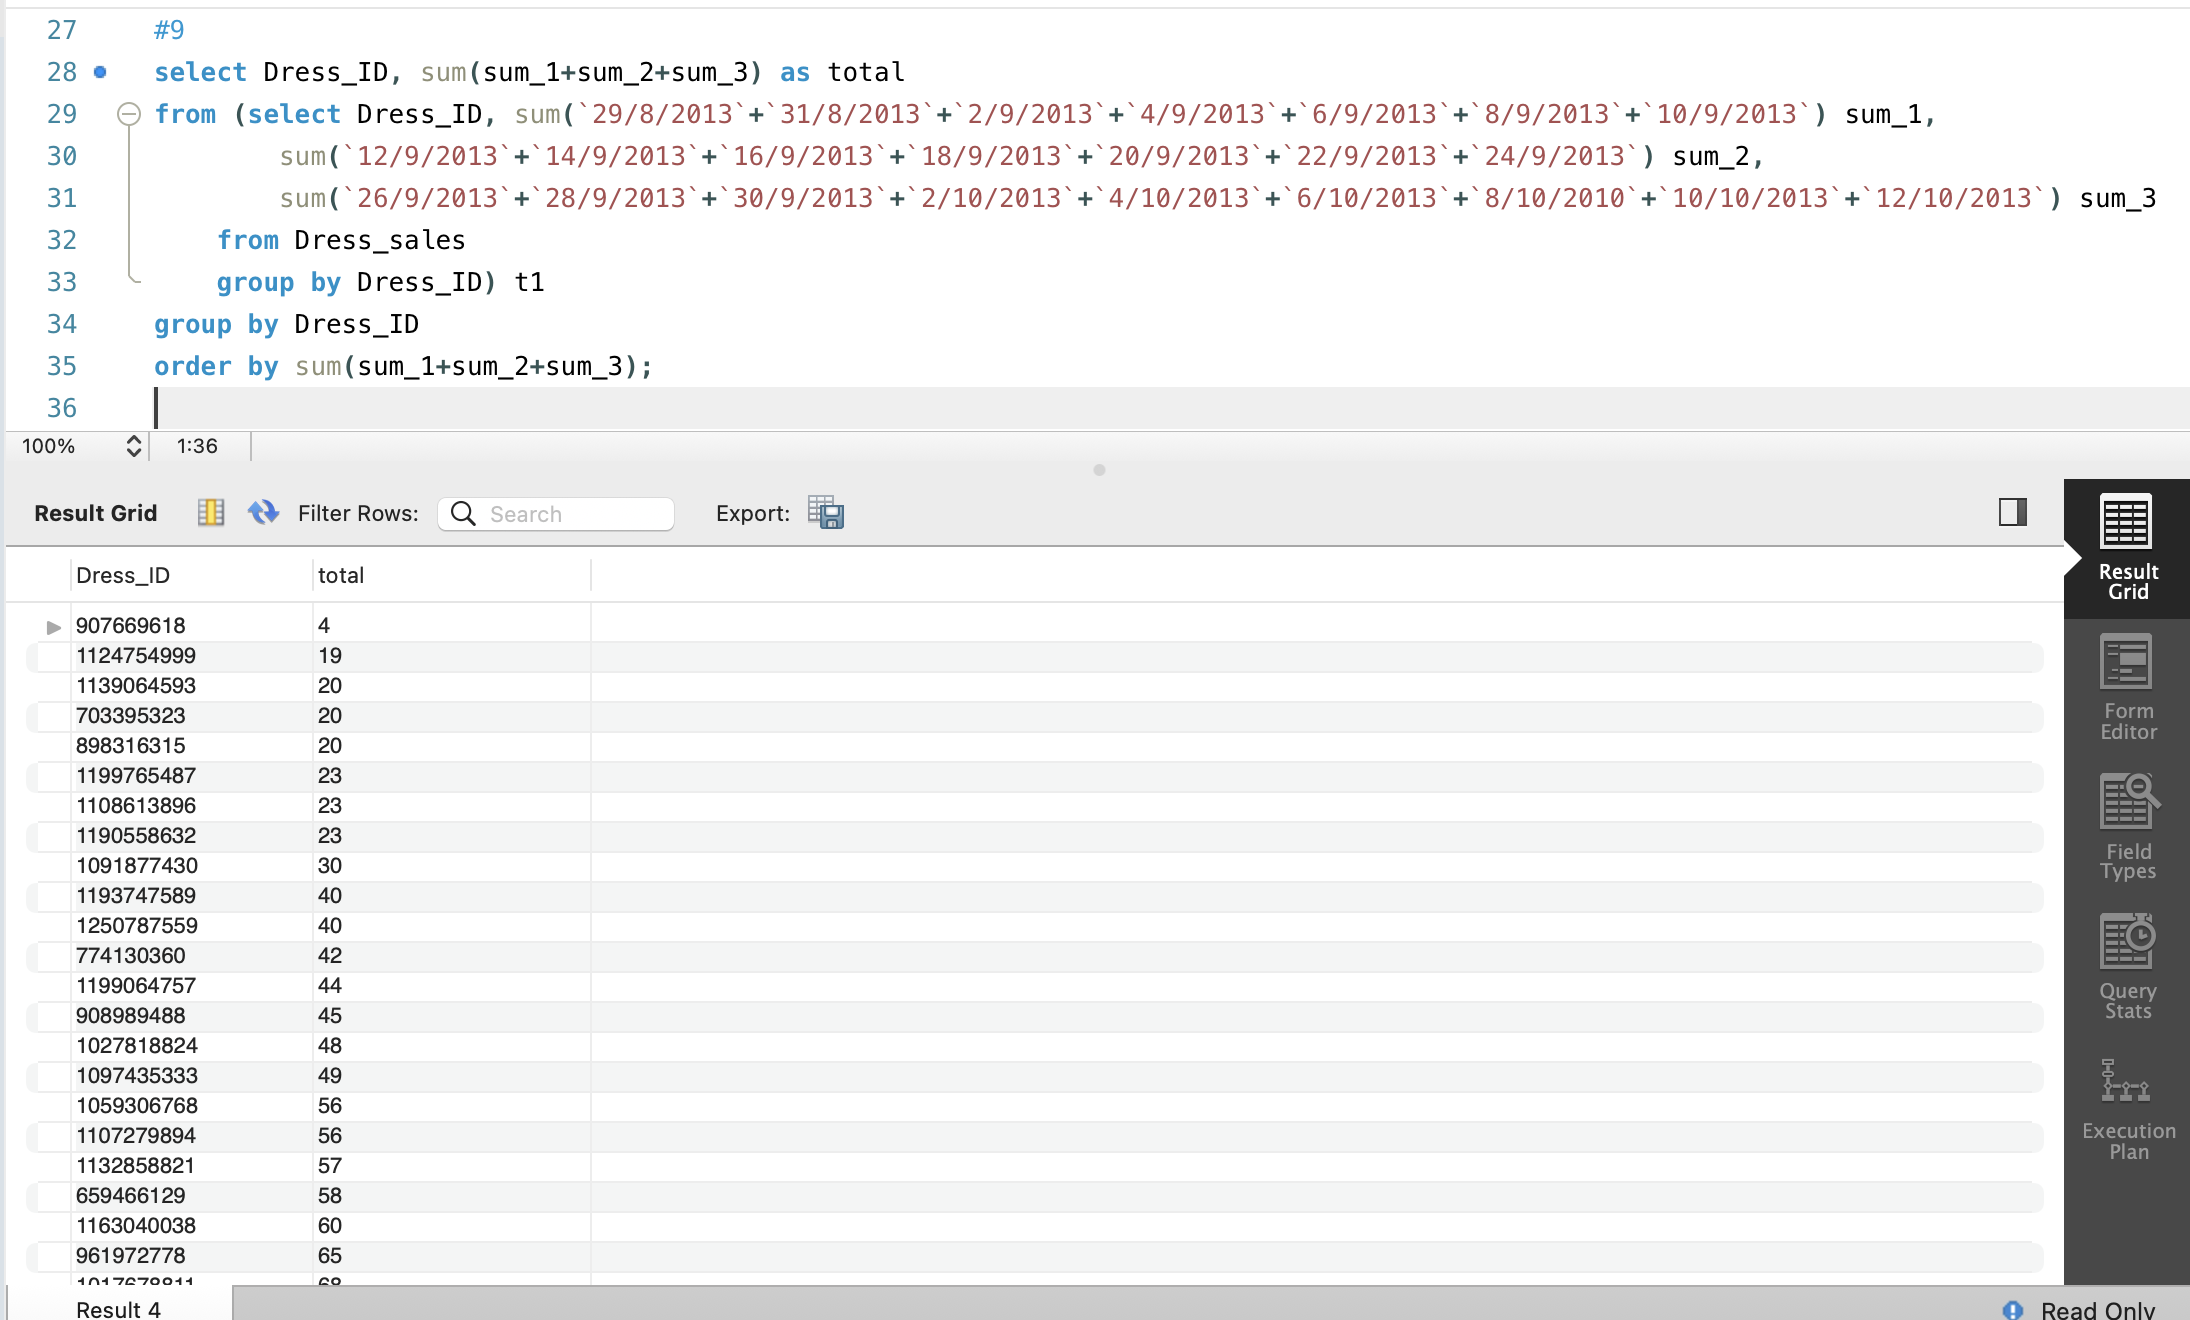

#### 10. Try to find out a third highest most selling dress id

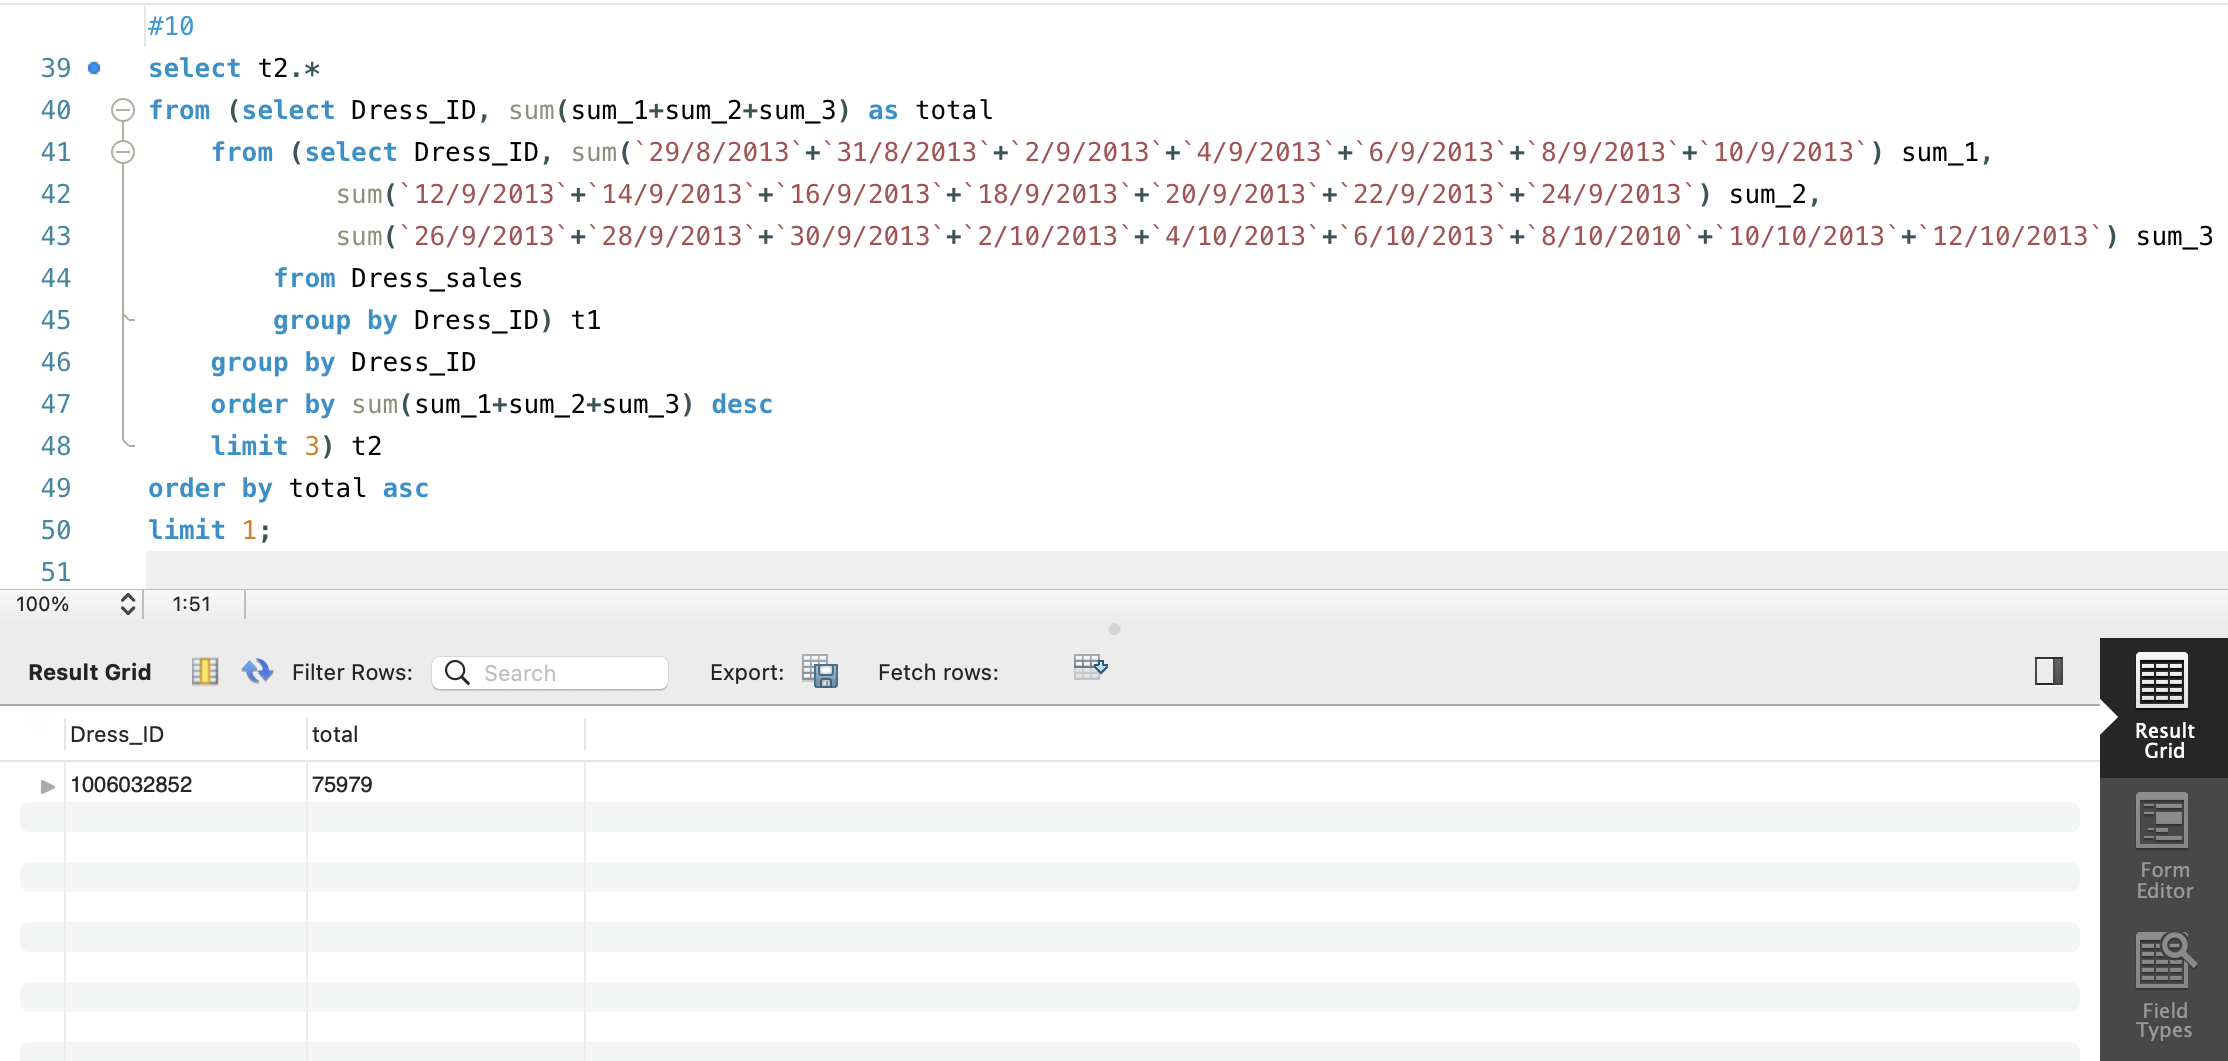